# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
city_type_group_ride_count = pyber_data_df.groupby(["type"]).count()['ride_id']
Total_Rides= pd.Series(city_type_group_ride_count,name="Total Rides")
Total_Rides

type
Rural        125
Suburban     625
Urban       1625
Name: Total Rides, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
city_type_group_driver_count = city_data_df.groupby(["type"]).sum()['driver_count']
Total_Drivers = pd.Series(city_type_group_driver_count,name="Total Drivers")
Total_Drivers

type
Rural         78
Suburban     490
Urban       2405
Name: Total Drivers, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
city_type_group_total_fares = pyber_data_df.groupby(["type"]).sum()['fare']
Total_Fares = pd.Series(city_type_group_total_fares,name="Total Fares")
Total_Fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Total Fares, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
Avg_Fare_per_Ride_by_city_type = (pyber_data_df.groupby(["type"]).sum()['fare'])/(pyber_data_df.groupby(["type"]).count()['ride_id'])
Avg_Fare_per_Ride = pd.Series(Avg_Fare_per_Ride_by_city_type,name="Average Fare per Ride")
Avg_Fare_per_Ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: Average Fare per Ride, dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
Avg_Fare_per_Driver_by_city_type = (city_type_group_total_fares/city_type_group_driver_count)
Avg_Fare_per_Driver = pd.Series(Avg_Fare_per_Driver_by_city_type,name="Average Fare per Driver")
Avg_Fare_per_Driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
Name: Average Fare per Driver, dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([Total_Rides,Total_Drivers,Total_Fares,Avg_Fare_per_Ride,Avg_Fare_per_Driver],axis=1)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  8. Format the columns.
pyber_summary_df.style.format({"Total Rides":"{:,}","Total Drivers":"{:,}",'Total Fares':"${:,.2f}","Average Fare per Ride":"${:.2f}","Average Fare per Driver":"${:.2f}"})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
city_date_group_fare_sum = pyber_data_df.groupby(['type','date']).sum()[['fare']]
city_date_group_fare_sum

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [15]:
#import pandas
#city_date_group_fare_sum['date'] = pd.to_datetime(city_date_group_fare_sum['date'], format = "%Y-%m-%d %H:%M:%S")
#city_date_group_fare_sum.dtypes

In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
city_date_group_fare_sum = city_date_group_fare_sum.reset_index()
city_date_group_fare_sum

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date
Pivoted_df = city_date_group_fare_sum.pivot(index = 'date', columns = 'type', values = 'fare')
Pivoted_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Jan_May_df = Pivoted_df.loc['2019-01-01':'2019-04-28']
Jan_May_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
Jan_May_df.index = pd.to_datetime(Jan_May_df.index)

In [20]:
# 7. Check that the datatype for the index is datetime using df.info()
Jan_May_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [21]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Jan_May_Weekly_df = Jan_May_df.resample('W').sum()
Jan_May_Weekly_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


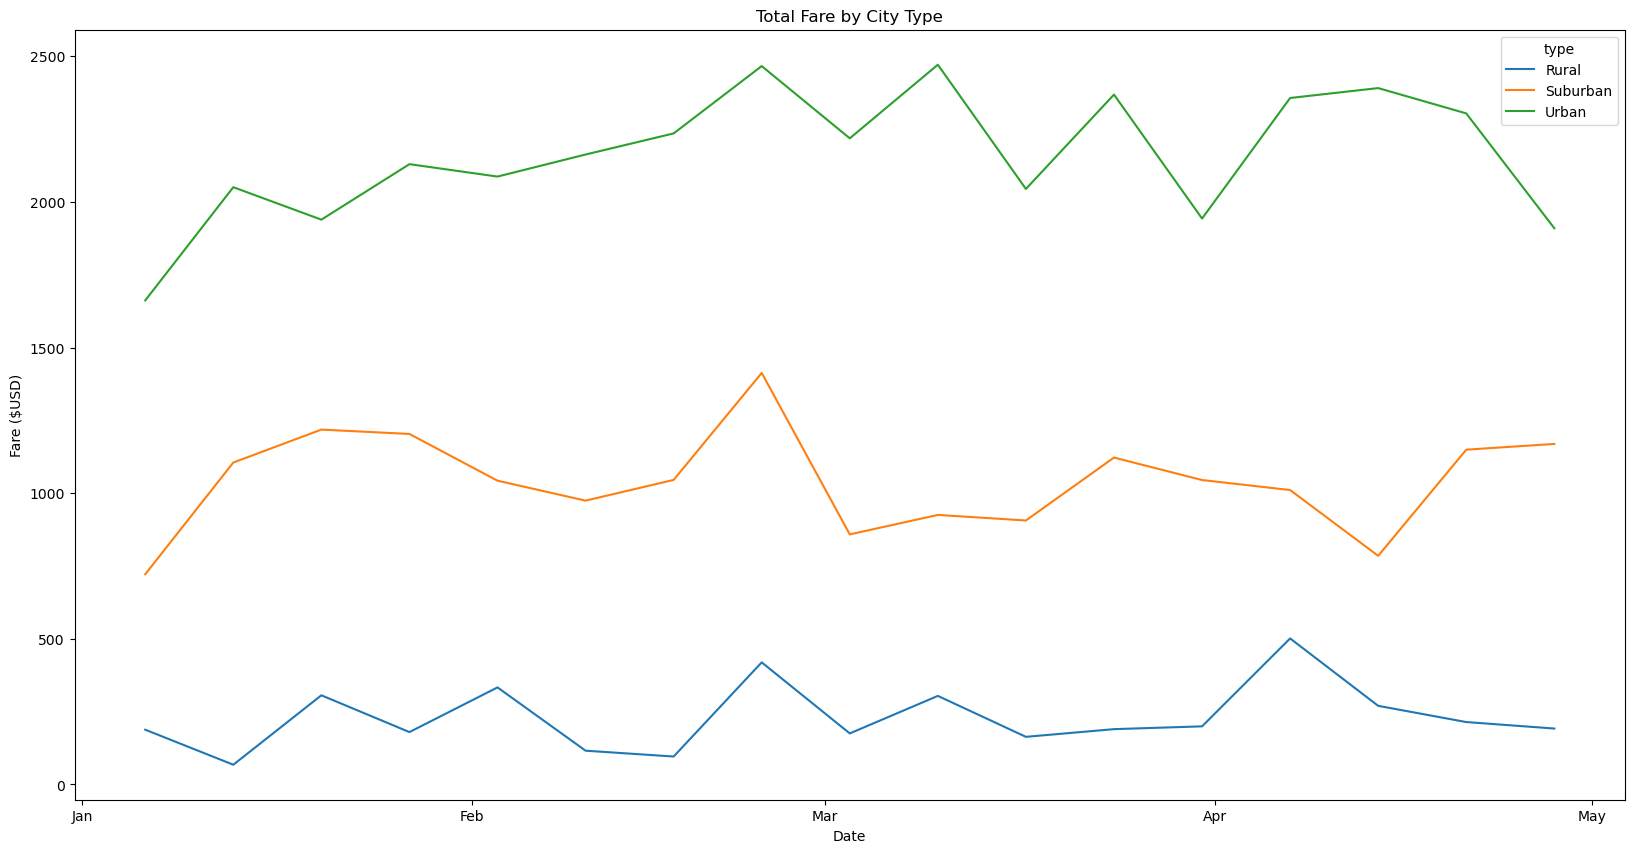

In [22]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Create the plot with ax.plt()
fig, df = plt.subplots(figsize=(20,10))
df.plot(Jan_May_Weekly_df.index, Jan_May_Weekly_df)

#Set Title and Labels for axes
df.set(xlabel = "Date",
      ylabel = "Fare ($USD)",
      title = "Total Fare by City Type")

df.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(0,1,2,3,4,5)))

df.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
df.legend(Jan_May_Weekly_df,title="type")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("Analysis/PyBer_fare_summary.png")

plt.show()

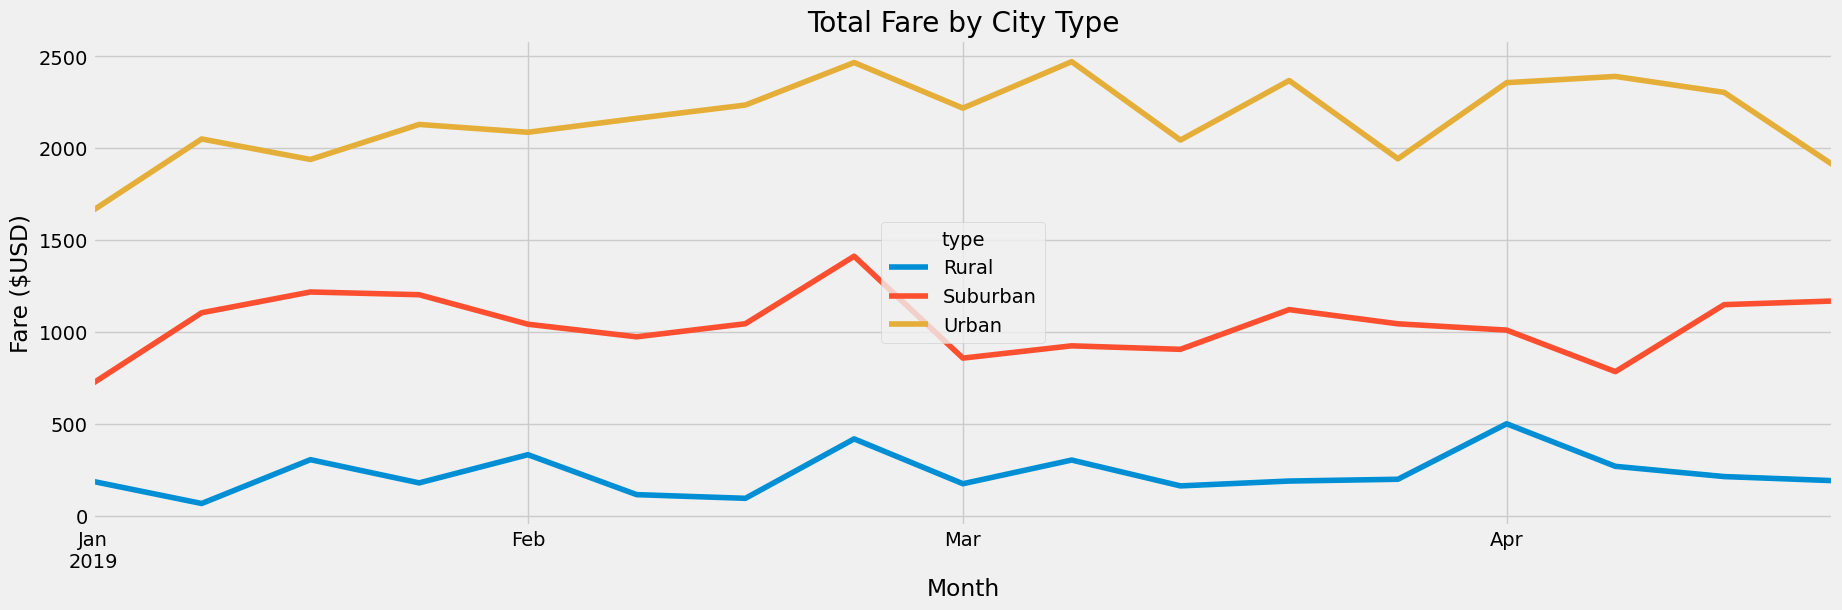

In [23]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = Jan_May_Weekly_df.plot(figsize = (20,6))
# Add a title 
ax.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")
plt.savefig("analysis/Challenge_fare_summary.png")
plt.show()